In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
cols = ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type", ]
df = pd.read_csv("trainKNN.txt", names=cols)
df.head()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
df.describe()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,1.518295,13.375204,2.758980,1.454337,72.635408,0.519388,8.910714,0.164235,0.050255,2.668367
std,0.003055,0.783145,1.392641,0.491688,0.763578,0.672703,1.421490,0.485198,0.086359,2.062416
min,1.511310,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516458,12.877500,2.362500,1.190000,72.317500,0.140000,8.220000,0.000000,0.000000,1.000000
50%,1.517630,13.280000,3.480000,1.360000,72.810000,0.560000,8.575000,0.000000,0.000000,2.000000
75%,1.518985,13.792500,3.610000,1.622500,73.080000,0.610000,9.092500,0.000000,0.090000,3.000000
max,1.533930,15.790000,4.490000,3.500000,75.180000,6.210000,16.190000,3.150000,0.340000,7.000000


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 1 to 211
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      196 non-null    float64
 1   Na      196 non-null    float64
 2   Mg      196 non-null    float64
 3   Al      196 non-null    float64
 4   Si      196 non-null    float64
 5   K       196 non-null    float64
 6   Ca      196 non-null    float64
 7   Ba      196 non-null    float64
 8   Fe      196 non-null    float64
 9   Type    196 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
columns = df.columns.to_list()
[columns.remove(col) for col in ["RI", "Type"]]
columns


['Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

In [8]:
sns.set_palette(sns.color_palette("hls", df['Type'].nunique()))
sns.color_palette()


[(0.86, 0.3712, 0.33999999999999997),
 (0.8287999999999999, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.3712),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.3712, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.8287999999999999)]

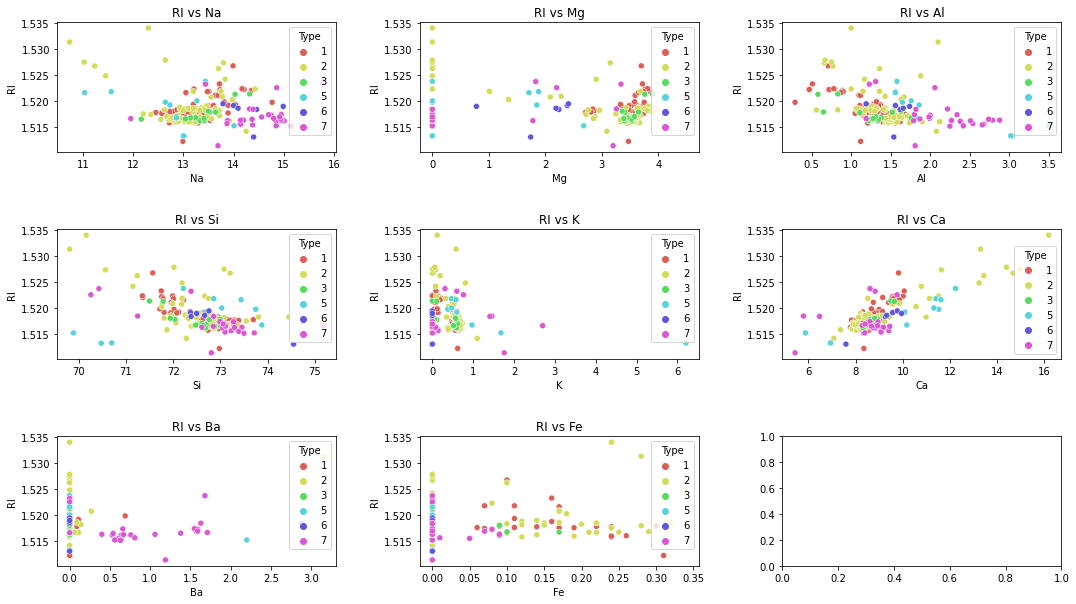

In [9]:
items_len = len(columns)
rows = int(np.ceil(items_len/3))
cols = 3 if items_len >= 3 else items_len
fig, axes = plt.subplots(rows, cols, figsize=(18, 10))
fig.subplots_adjust(wspace=0.3, hspace=0.6)

for i, name in enumerate(columns):
    axis = axes[int(i//3), i % 3]
    axis.set_title(f'RI vs {name}')
    sns.scatterplot(data=df, y='RI', x=name, hue='Type',
                    ax=axis, palette=sns.color_palette())


<AxesSubplot:>

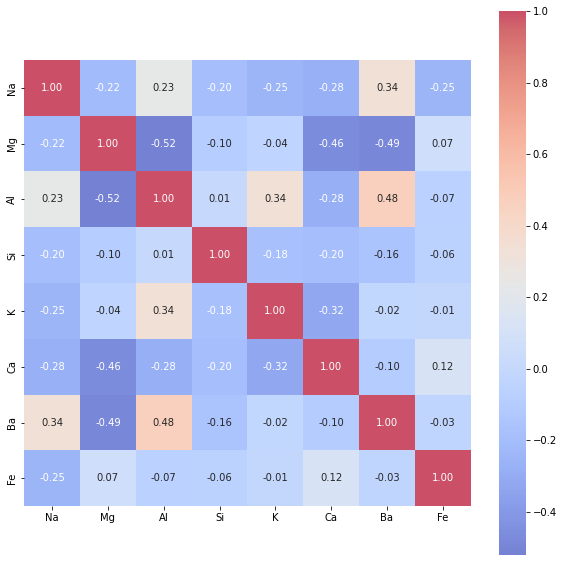

In [10]:
corr = df[columns].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cbar=True,  square=True, annot=True, fmt='.2f',
            xticklabels=columns, yticklabels=columns, alpha=0.7,   cmap='coolwarm')


/home/john/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='count'>

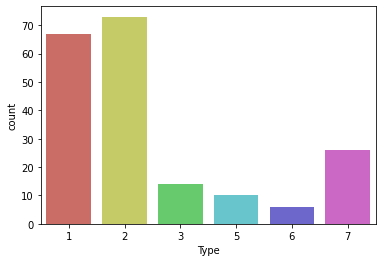

In [11]:
sns.countplot(df['Type'])


<AxesSubplot:>

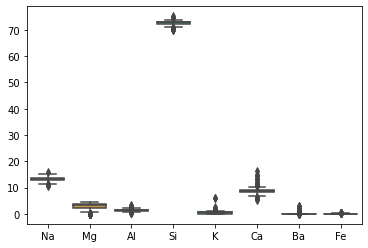

In [12]:
sns.boxplot(data=df[columns])


In [13]:
X_train = df.drop('Type', axis=1)
y_train = df['Type']


In [14]:
# importing the required function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  # initialis
scaler.fit(X_train)  # find the values of mu and sigma
X_train_scaled = pd.DataFrame(scaler.transform(
    X_train), columns=X_train.columns.to_list())
X_train_scaled.head()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.890812,0.338985,1.246160,-0.722499,-1.123132,-0.684647,-0.113350,-0.339357,-0.583422
1,-0.224796,0.659028,0.605450,-0.192354,0.124197,-0.058701,-0.762215,-0.339357,-0.583422
2,-0.694007,0.198166,0.569455,0.174669,0.465571,-0.192833,-0.797480,-0.339357,-0.583422
3,-0.208390,-0.211490,0.670241,-0.335086,-0.033360,0.075430,-0.487153,-0.339357,-0.583422
4,-0.287138,-0.134679,0.619848,-0.437037,0.583739,0.045623,-0.592946,-0.339357,-0.583422


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SequentialFeatureSelector
estimator = KNeighborsClassifier()
sfs = SequentialFeatureSelector(estimator, )
sfs.fit(X_train_scaled, y_train)
sfs.get_support()


array([ True, False,  True,  True, False,  True, False, False, False])

In [16]:
features = X_train.columns[sfs.get_support()].to_list()
features


['RI', 'Mg', 'Al', 'K']

In [17]:
scaler = StandardScaler()  # initialis
scaler.fit(X_train[features])  # find the values of mu and sigma
X_train_scaled = scaler.transform(X_train[features])


In [18]:
from sklearn.model_selection import cross_val_score


def find_best_k_metric(X, y, metric, cv=5):
    [k, best_k, current_score, last_score] = [0]*4
    while current_score >= last_score:
        [best_k, last_score] = [k, current_score]
        k += 1
        clf = KNeighborsClassifier(n_neighbors=k, metric=metric)
        clf.fit(X, y)
        current_score = cross_val_score(
            clf, X, y, cv=cv, scoring='accuracy').mean()
        # print(k, current_score)
    return [best_k, current_score]


In [19]:
k_object = {}
for metric in ["euclidean", "manhattan"]:
    [k, score] = find_best_k_metric(X_train_scaled, y_train, metric)
    k_object[metric] = k
    print(f'metric={metric}, k={k}, score={score:.4f}')


metric=euclidean, k=2, score=0.6994
metric=manhattan, k=1, score=0.6994


In [20]:
cols = ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type", ]
df_test = pd.read_csv("testKNN.txt", names=cols)
df_test.head()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1
69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2
145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2


In [21]:
from sklearn import metrics

X_test = df_test.drop('Type', axis=1)[features]
y_test = df_test['Type']

# euclidean
clf = KNeighborsClassifier(
    n_neighbors=k_object['euclidean'], metric='euclidean')
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(scaler.transform(X_test))
print("euclidean", metrics.r2_score(y_test, y_pred))

# manhattan
clf = KNeighborsClassifier(n_neighbors=k_object['manhattan'], metric='manhattan')
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(scaler.transform(X_test))
print("manhattan", metrics.r2_score(y_test, y_pred))


euclidean 0.38095238095238093
manhattan 0.34523809523809523
